In [1]:
import sys
!{sys.executable} -m pip install transformers
!{sys.executable} -m pip install pycaret

     |████████████████████████████████| 2.5MB 5.3MB/s 
     |████████████████████████████████| 3.3MB 31.9MB/s 
     |████████████████████████████████| 901kB 5.9MB/s 
     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 1.7MB 9.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8MB 32.7MB/s 
     |████████████████████████████████| 1.4MB 33.7MB/s 
     |████████████████████████████████| 174kB 37.0MB/s 
     |████████████████████████████████| 112kB 38.3MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 276kB 28.1MB/s 
     |████████████████████████████████| 256kB 39.3MB/s 
     |████████████████████████████████| 14.2MB 208kB/s 
     |████████████████████████████████| 2.0MB 28.2MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from sklearn.decomposition import PCA
import tensorflow_hub as hub
from pycaret.classification import * 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
#from googletrans import Translator
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)
import pandas as pd
import pycaret 

In [5]:
true_data=pd.read_csv('True.csv')

In [6]:
fake_data=pd.read_csv('Fake.csv')

In [7]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
true_data['Target']=['True']*len(true_data)
fake_data["Target"]=['Fake']*len(fake_data)

In [10]:
data=true_data.append(fake_data).sample(frac=1).reset_index().drop(columns='index')

In [11]:
cat_tar=pd.get_dummies(data.Target)['Fake']

In [12]:
label_size = [cat_tar.sum(),len(cat_tar)-cat_tar.sum()]

([<matplotlib.patches.Wedge at 0x7fdfc861d950>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

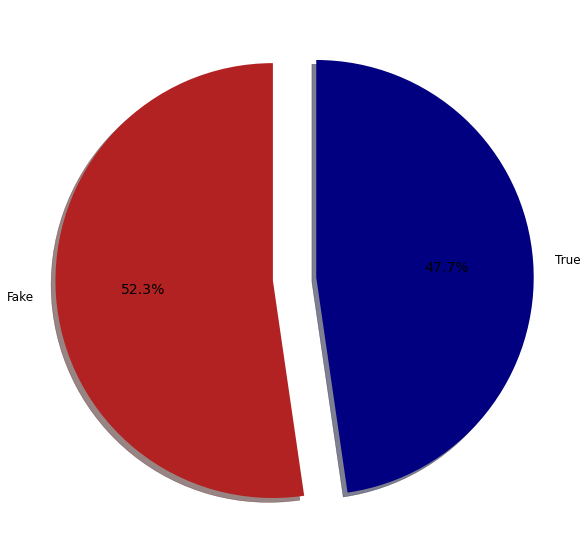

In [13]:
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [14]:
import sklearn.preprocessing as preprocessing

In [15]:
data['label']=pd.get_dummies(data.Target)['Fake']


In [16]:
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'], 
                                                                    random_state=2021, 
                                                                    test_size=0.3, 
                                                                    stratify=data['Target'])

In [17]:
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2021, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [18]:
bert=AutoModel.from_pretrained('bert-base-uncased')
tokenizer=BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'No. of texts')

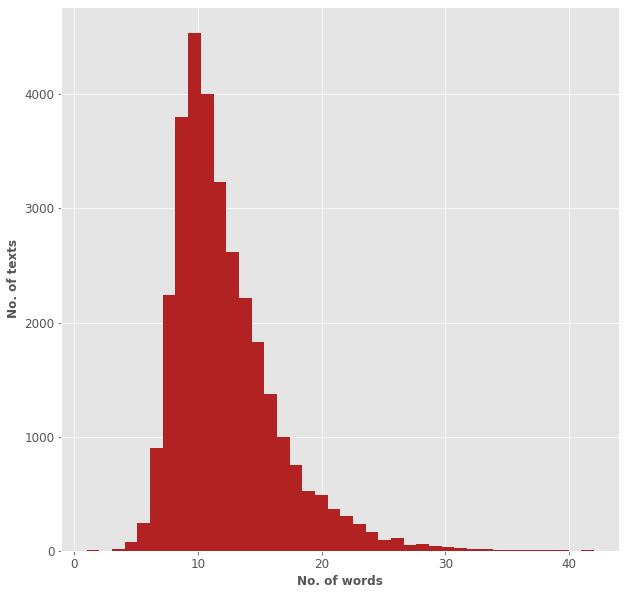

In [19]:
seq_len = [len(i.split()) for i in train_text]
pd.Series(seq_len).hist(bins=40,color='firebrick')
plt.xlabel('No. of words')
plt.ylabel('No. of texts')

In [20]:
max_length=20
token_train=tokenizer.batch_encode_plus(train_text.tolist(),
                                        max_length=max_length,
                                        pad_to_max_length=True,
                                        truncation=True)
token_val=tokenizer.batch_encode_plus(val_text.tolist(),
                                      max_length=max_length,
                                      pad_to_max_length=True,
                                      truncation=True)
token_test=tokenizer.batch_encode_plus(test_text.tolist(),
                                       max_length=max_length,
                                       pad_to_max_length=True,
                                       truncation=True)


In [21]:
train_seq=torch.tensor(token_train['input_ids'])
train_mask=torch.tensor(token_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq=torch.tensor(token_val['input_ids'])
val_mask=torch.tensor(token_val['attention_mask'])
val_y=torch.tensor(val_labels.tolist())

test_seq=torch.tensor(token_test['input_ids'])
test_mask=torch.tensor(token_test['attention_mask'])
test_y=torch.tensor(test_labels.tolist())

In [22]:
from torch.utils.data import TensorDataset,DataLoader,RandomSampler,SequentialSampler
batch_size=128
train_data=TensorDataset(train_seq,train_mask,train_y)
train_sampler=RandomSampler(train_data)
train_dataloader=DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)
val_data=TensorDataset(val_seq,val_mask,val_y)
val_sampler=SequentialSampler(val_data)
val_dataloader=DataLoader(val_data,sampler=val_sampler,batch_size=batch_size)

In [23]:
#Freezing the parameters and defining the trainable BERT structure
for param in bert.parameters():
  param.requires_grad=False

In [24]:
class BERT_Arch(nn.Module):
  def __init__(self,bert):
    super(BERT_Arch,self).__init__()
    self.bert=bert
    self.Dropout=nn.Dropout(0.1)
    self.relu=nn.ReLU()
    self.fc1=nn.Linear(768,512)
    self.fc2=nn.Linear(512,2)
    self.softmax=nn.LogSoftmax(dim=1)
  def forward(self,sent_id,mask):
    cls_hs=self.bert(sent_id,attention_mask=mask)['pooler_output']
    x=self.fc1(cls_hs)
    x=self.relu(x)
    x=self.Dropout(x)
    x=self.fc2(x)
    x=self.softmax(x)
    return x

model=BERT_Arch(bert)


In [25]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(train_labels), train_labels)
print('Class weights:',class_weights)

Class weights: [1.04815902 0.95607204]


In [26]:
weights=torch.tensor(class_weights,dtype=torch.float)
cross_entropy=nn.NLLLoss(weight=weights)
epochs=10

In [27]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)  

In [28]:
def train():
  model.train()
  total_loss,total_accuracy=0,0
  total_preds=[]#Empty list to save model predictions
  #iterate over batches
  for step,batch in enumerate(train_dataloader):
    if step%50==0 and not step==0:
      #progress update
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
      # push the batch to gpu
    batch = [r for r in batch]
    sent_id, mask, labels = batch
    # clear previously calculated gradients 
    model.zero_grad()
    # get model predictions for the current batch
    preds = model(sent_id, mask)
    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)
      # add on to the total loss
    total_loss += loss.item()
     # backward pass to calculate the gradients
    loss.backward() 
    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # update parameters
    optimizer.step()
     # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()
      # append the model predictions
    total_preds.append(preds)
     # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)
    #returns the loss and predictions
    return avg_loss, total_preds





In [29]:
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      #elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [30]:
best_valid_loss=float('inf')
# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]
#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation Loss: 0.704

 Epoch 2 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation Loss: 0.698

 Epoch 3 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation Loss: 0.694

 Epoch 4 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation Loss: 0.689

 Epoch 5 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation Loss: 0.685

 Epoch 6 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation Loss: 0.680

 Epoch 7 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation Loss: 0.676

 Epoch 8 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation Loss: 0.673

 Epoch 9 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation Loss: 0.669

 Epoch 10 / 10

Evaluating...
  Batch    50  of     53.

Training Loss: 0.003
Validation L

In [32]:
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.75      0.55      0.64      3213
           1       0.67      0.84      0.74      3522

    accuracy                           0.70      6735
   macro avg       0.71      0.69      0.69      6735
weighted avg       0.71      0.70      0.69      6735



In [33]:
confusion_matrix(preds,test_y)

NameError: ignored

In [ ]:
#Universal Sentence Encoder+PyCaret
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
data_matrix = embed(data.title.tolist())

In [ ]:
train_data = data.loc[0:int(len(data)*0.8)]
test_data = data.loc[int(len(data)*0.8):len(data)]

In [ ]:
pca = PCA(n_components=3)
pca_data = pca.fit(data_matrix[0:len(train_data)])
pca_train = pca.transform(data_matrix[0:len(train_data)])

In [ ]:
pca_3_data = pd.DataFrame({'First Component':pca_train[:,0],'Second Component':pca_train[:,1],'Third Component':pca_train[:,2],'Target': train_data.Target})

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(x='First Component', y = 'Second Component',hue='Target',data=pca_3_data,s=2)
plt.grid(True)
plt.subplot(1,3,2)
sns.scatterplot(x='First Component', y = 'Third Component',hue='Target',data=pca_3_data,s=2)
plt.grid(True)
plt.subplot(1,3,3)
sns.scatterplot(x='Second Component', y = 'Third Component',hue='Target',data=pca_3_data,s=2)
plt.grid(True)

In [ ]:
setup(data = pca_3_data, target='Target')

In [ ]:
best_model = compare_models()

In [ ]:
plot_confusion_matrix(best_model,pca_test,y_true,cmap='plasma')